<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Bisecting_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

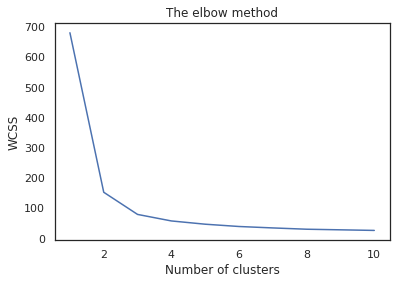

In [18]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [19]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

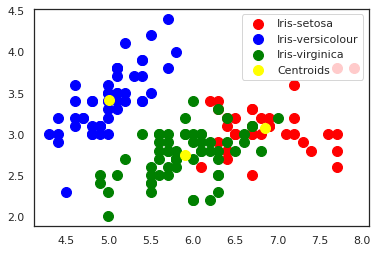

In [20]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [21]:
print(kmeans.inertia_)

78.94084142614602


In [25]:
cluster_centers = [x[kmeans.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(x, kmeans.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()

In [26]:
clusterwise_sse

[23.879473684210517, 15.240400000000003, 39.820967741935476]

Bisecting K-means

In [41]:
#step 1
def run_kmeans(n, data):
  kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  y_kmeans = kmeans.fit_predict(data)
  cluster_centers = [x[kmeans.labels_ == i].mean(axis=0) for i in range(2)]

  clusterwise_sse = [0, 0]
  for point, label in zip(x, kmeans.labels_):
      clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
  return y_kmeans,clusterwise_sse,kmeans



In [44]:
x = dataset.iloc[:, [1, 2, 3, 4]].values
for i in range(3):

  y_kmeans,clusterwise_sse,kmeans= run_kmeans(2,x)
  
  print(clusterwise_sse)
  x = x[kmeans.labels_ == 0] if clusterwise_sse[0]>clusterwise_sse[1] else x[kmeans.labels_ == 1]

[28.57283018867925, 123.7958762886598]
[23.879473684210517, 31.77220338983051]
[6.432, 10.735882352941172]
